In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/iris/database.sqlite
/kaggle/input/iris/Iris.csv


**Importing Packages**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from scipy.stats import chi2_contingency,shapiro, fisher_exact
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from statsmodels.multivariate.manova import MANOVA

from scipy.stats import chi2

import warnings
warnings.filterwarnings('ignore')

In [3]:
#load the dataset with index column as Id
data = pd.read_csv('/kaggle/input/iris/Iris.csv', index_col=0) 
#checking if there is any inconsistency in the dataset
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [4]:
type(data)

pandas.core.frame.DataFrame

In [5]:
#Descriptive statistics
#Summarize all numeric columns
data.describe() 



,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


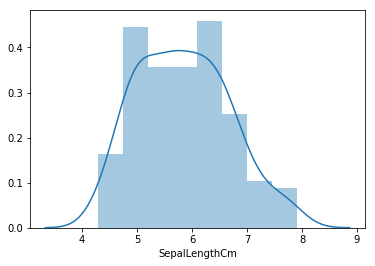

In [6]:
#check distribution of data

sns.distplot(data['SepalLengthCm'])



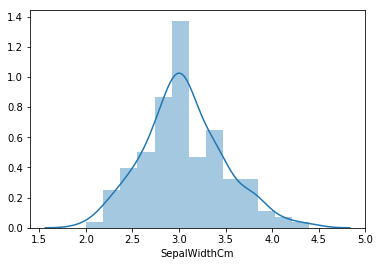

In [7]:
sns.distplot(data['SepalWidthCm'])


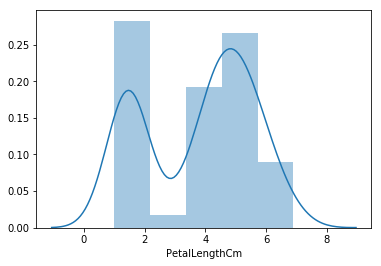

In [8]:
sns.distplot(data['PetalLengthCm'])


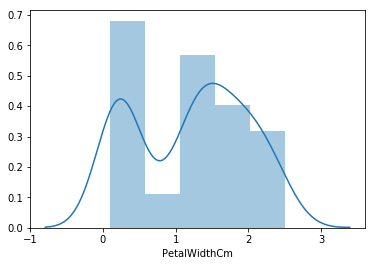

In [9]:
sns.distplot(data['PetalWidthCm'])

In [10]:
#The Shapiro-Wilk test evaluates a data sample and quantifies how likely it is that 
#the data was drawn from a normal distribution, named for Samuel Shapiro and Martin Wilk.

stat, p = shapiro(data['SepalLengthCm'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('SepalLengthCm feature distribution looks normal (fail to reject H0)')
else:
    print('SepalLengthCm feature distribution does not look normal (reject H0)')
    

stat, p = shapiro(data['SepalWidthCm'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('SepalWidthCm feature distribution looks normal (fail to reject H0)')
else:
    print('SepalWidthCm feature distribution does not look normal (reject H0)')
    

stat, p = shapiro(data['PetalLengthCm'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('PetalLengthCm feature distribution looks normal (fail to reject H0)')
else:
    print('PetalLengthCm feature distribution does not look normal (reject H0)')

stat, p = shapiro(data['PetalWidthCm'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('PetalWidthCm feature distribution looks normal (fail to reject H0)')
else:
    print('PetalWidthCm feature distribution does not look normal (reject H0)')

Statistics=0.976, p=0.010
SepalLengthCm feature distribution does not look normal (reject H0)
Statistics=0.984, p=0.075
SepalWidthCm feature distribution looks normal (fail to reject H0)
Statistics=0.876, p=0.000
PetalLengthCm feature distribution does not look normal (reject H0)
Statistics=0.903, p=0.000
PetalWidthCm feature distribution does not look normal (reject H0)


In [11]:
data['Species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

In [12]:
#Compute the featureswise variance i.e. measure of the spread of a distribution
#The variance is the average of the squared deviations from the mean, i.e., var = mean(abs(x - x.mean())**2).

for i in data.columns:
    if i != 'Species':
        print(i, ' ' , data[i].var())

SepalLengthCm   0.6856935123042505
SepalWidthCm   0.18800402684563763
PetalLengthCm   3.1131794183445156
PetalWidthCm   0.5824143176733784


In [13]:
#checking if this is multiclass problem or binary classsification problem
data['Species'].value_counts() 


Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

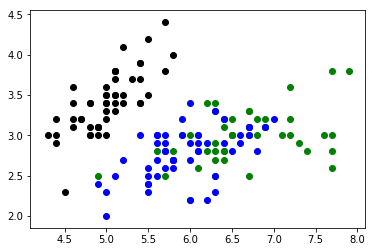

In [14]:
fig, axes = plt.subplots(ncols=1, nrows=1)
axes.scatter(x=data[data['Species']=='Iris-virginica']['SepalLengthCm'], y=data[data['Species']=='Iris-virginica']['SepalWidthCm'], color='green')
axes.scatter(x=data[data['Species']=='Iris-versicolor']['SepalLengthCm'], y=data[data['Species']=='Iris-versicolor']['SepalWidthCm'], color='blue')
axes.scatter(x=data[data['Species']=='Iris-setosa']['SepalLengthCm'], y=data[data['Species']=='Iris-setosa']['SepalWidthCm'], color='black')



In [15]:
#compute pairwise correlation of features
data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


In [16]:
maov = MANOVA.from_formula('SepalLengthCm + SepalWidthCm + \
                            PetalLengthCm + PetalWidthCm  ~ Species', data=data)
print(maov.mv_test())

                   Multivariate linear model
                                                                
----------------------------------------------------------------
       Intercept         Value  Num DF  Den DF   F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda  0.0170 4.0000 144.0000 2080.5278 0.0000
         Pillai's trace  0.9830 4.0000 144.0000 2080.5278 0.0000
 Hotelling-Lawley trace 57.7924 4.0000 144.0000 2080.5278 0.0000
    Roy's greatest root 57.7924 4.0000 144.0000 2080.5278 0.0000
----------------------------------------------------------------
                                                                
----------------------------------------------------------------
        Species          Value  Num DF  Den DF   F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda  0.0235 8.0000 288.0000  198.7110 0.0000
         Pillai's trace  1.1872 8.0000 290.00

Let's use chi-square test to understand relationship between categorical variables and target variable.


**Assume Null hypothesys -**
Ho: Variables A(SepalLengthCm/SepalWidthCm/PetalLengthCm/PetalLengthCm) and Variable B(Species) are independent.


**Assume alternate hypothesys -**
Ha: Variable A SepalLengthCm/SepalWidthCm/PetalLengthCm/PetalLengthCm)and Variable B(Species) are not independent.

Significance level : 0.05

In [17]:
print('Ho: Species and SepalLengthCm are not independent features')
print('Ha: Species and SepalLengthCm are independent features')

chi_squared_stat, p_value, dof, expected=chi2_contingency(pd.crosstab(data['Species'], data['SepalLengthCm']))
print("chi_squared_stat :", chi_squared_stat)
probability=0.95
critical=chi2.ppf(probability, dof)
if abs(chi_squared_stat)>=critical:
    print('Dependent : Reject Hypothesis 0 (null Hypothesis)')
elif abs(chi_squared_stat)<critical:
    print('Inependent : Fail to Reject Hypothesis 0 (null Hypothesis)')
    
alpha = 1.0 - probability
print('Significance {0}, {1}'.format(alpha, p_value))
if p_value<=alpha:
    print("Dependent : Reject Hypothesis 0 (null Hypothesis)")
else:
    print('Inependent : Fail to Reject Hypothesis 0 (null Hypothesis)')
        
    print('================================================================')

Ho: Species and SepalLengthCm are not independent features
Ha: Species and SepalLengthCm are independent features
chi_squared_stat : 156.26666666666668
Dependent : Reject Hypothesis 0 (null Hypothesis)
Significance 0.050000000000000044, 6.665987344005466e-09
Dependent : Reject Hypothesis 0 (null Hypothesis)


In [18]:
print('Ho: Species and SepalWidthCm are not independent features')
print('Ha: Species and SepalWidthCm are independent features')

chi_squared_stat, p_value, dof, expected=chi2_contingency(pd.crosstab(data['Species'], data['SepalWidthCm']))
print("chi_squared_stat :", chi_squared_stat)
probability=0.95
critical=chi2.ppf(probability, dof)
if abs(chi_squared_stat)>=critical:
    print('Dependent : Reject Hypothesis 0 (null Hypothesis)')
elif abs(chi_squared_stat)<critical:
    print('Inependent : Fail to Reject Hypothesis 0 (null Hypothesis)')
    
alpha = 1.0 - probability
print('Significance {0}, {1}'.format(alpha, p_value))
if p_value<=alpha:
    print("Dependent : Reject Hypothesis 0 (null Hypothesis)")
else:
    print('Inependent : Fail to Reject Hypothesis 0 (null Hypothesis)')
        
    print('================================================================')

Ho: Species and SepalWidthCm are not independent features
Ha: Species and SepalWidthCm are independent features
chi_squared_stat : 88.36446886446886
Dependent : Reject Hypothesis 0 (null Hypothesis)
Significance 0.050000000000000044, 8.303947787862062e-05
Dependent : Reject Hypothesis 0 (null Hypothesis)


In [19]:
print('Ho: Species and PetalLengthCm are not independent features')
print('Ha: Species and PetalLengthCm are independent features')

chi_squared_stat, p_value, dof, expected=chi2_contingency(pd.crosstab(data['Species'], data['PetalLengthCm']))
print("chi_squared_stat :", chi_squared_stat)
probability=0.95
critical=chi2.ppf(probability, dof)
if abs(chi_squared_stat)>=critical:
    print('Dependent : Reject Hypothesis 0 (null Hypothesis)')
elif abs(chi_squared_stat)<critical:
    print('Inependent : Fail to Reject Hypothesis 0 (null Hypothesis)')
    
alpha = 1.0 - probability
print('Significance {0}, {1}'.format(alpha, p_value))
if p_value<=alpha:
    print("Dependent : Reject Hypothesis 0 (null Hypothesis)")
else:
    print('Inependent : Fail to Reject Hypothesis 0 (null Hypothesis)')
        
    print('================================================================')

Ho: Species and PetalLengthCm are not independent features
Ha: Species and PetalLengthCm are independent features
chi_squared_stat : 271.79999999999995
Dependent : Reject Hypothesis 0 (null Hypothesis)
Significance 0.050000000000000044, 1.1775672327529825e-21
Dependent : Reject Hypothesis 0 (null Hypothesis)


In [20]:
print('Ho: Species and PetalWidthCm are not independent features')
print('Ha: Species and PetalWidthCm are independent features')

chi_squared_stat, p_value, dof, expected=chi2_contingency(pd.crosstab(data['Species'], data['PetalWidthCm']))
print("chi_squared_stat :", chi_squared_stat)
probability=0.95
critical=chi2.ppf(probability, dof)
if abs(chi_squared_stat)>=critical:
    print('Dependent : Reject Hypothesis 0 (null Hypothesis)')
elif abs(chi_squared_stat)<critical:
    print('Inependent : Fail to Reject Hypothesis 0 (null Hypothesis)')
    
alpha = 1.0 - probability
print('Significance {0}, {1}'.format(alpha, p_value))
if p_value<=alpha:
    print("Dependent : Reject Hypothesis 0 (null Hypothesis)")
else:
    print('Inependent : Fail to Reject Hypothesis 0 (null Hypothesis)')
        
    print('================================================================')

Ho: Species and PetalWidthCm are not independent features
Ha: Species and PetalWidthCm are independent features
chi_squared_stat : 271.75
Dependent : Reject Hypothesis 0 (null Hypothesis)
Significance 0.050000000000000044, 2.1648103108815957e-35
Dependent : Reject Hypothesis 0 (null Hypothesis)


From above analysis, we can say that varibles A (SepalLengthCm/SepalWidthCm/PetalLengthCm/PetalLengthCm) and Variable B(Species) are dependent on each other

In [21]:
data['Species'].shape

(150,)

In [22]:
data['PetalWidthCm'].shape

(150,)

**Quality check**

In [23]:
#Remove duplicate data
data =data.drop_duplicates()

In [24]:
data.shape

(147, 5)

In [25]:
#Missing data
data.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

**Dealing with outliers**

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe898146ac8>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe8980d3198>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe898146978>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe8980d3828>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe8980d3b70>],
 'means': []}

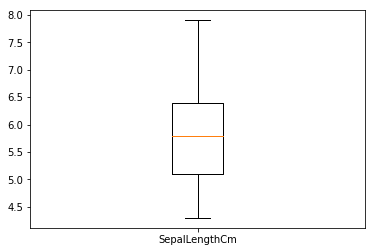

In [26]:
plt.boxplot(data['SepalLengthCm'], labels=['SepalLengthCm'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe89809cdd8>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe8980a74e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe89809cc88>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe8980a7b70>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe8980a7eb8>],
 'means': []}

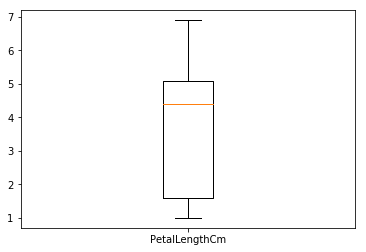

In [27]:
plt.boxplot(data['PetalLengthCm'], labels=['PetalLengthCm'])


{'whiskers': [<matplotlib.lines.Line2D at 0x7fe898078978>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe898081080>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe898078828>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe898081710>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe898081a58>],
 'means': []}

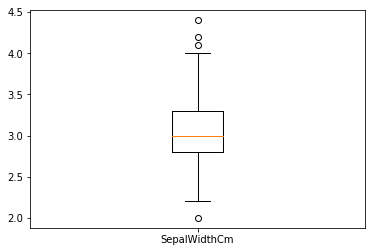

In [28]:
plt.boxplot(data['SepalWidthCm'], labels=['SepalWidthCm'])

Statistically identify outliers in a pandas Series using interquartile range method.

In [29]:
q25, q75 = np.percentile(data['SepalWidthCm'], 25), np.percentile(data['SepalWidthCm'], 75)
iqr = q75 - q25
cut_off = iqr * 1.5   
lower, upper = q25 - cut_off, q75 + cut_off

In [30]:
data1 = data[(data['SepalWidthCm']> upper) | (data['SepalWidthCm']<lower)]
data1

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
16,5.7,4.4,1.5,0.4,Iris-setosa
33,5.2,4.1,1.5,0.1,Iris-setosa
34,5.5,4.2,1.4,0.2,Iris-setosa
61,5.0,2.0,3.5,1.0,Iris-versicolor


In [31]:
indices = data.index[(data['SepalWidthCm']> upper) | (data['SepalWidthCm']<lower)]
data.drop(index=indices, axis=0, inplace=True)

In [32]:
data.shape

(143, 5)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe893b99320>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe893b999e8>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe893b991d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe893ba20b8>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe893ba2400>],
 'means': []}

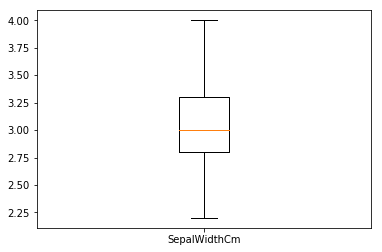

In [33]:
plt.boxplot(data['SepalWidthCm'], labels=['SepalWidthCm'] )

4 records which were outliers have been removed and now we can see outliers have been removed

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe893b74550>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe893b74c18>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe893b74400>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe893b7b2e8>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe893b7b630>],
 'means': []}

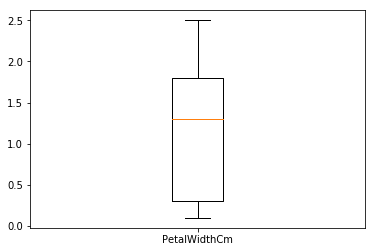

In [34]:
plt.boxplot(data['PetalWidthCm'], labels=['PetalWidthCm'] )

So outliers were present only in SepalWidthCm feature 

In [35]:
scaler = StandardScaler()
Y = data['Species']
X = data.drop('Species', axis=1)

X = scaler.fit_transform(X)

In [36]:
'''kfold = KFold(n_splits=5)

models = {
    'RandomForest': RandomForestClassifier(),
    'SVC': SVC(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'GaussianNB': GaussianNB(),
    'KNeighborsClassifier':KNeighborsClassifier(),
    'LogisticRegression':LogisticRegression()
}

for i, j in models.items():
    m1 = cross_val_score(j,X, Y,  cv=kfold)
    print(i, ':', round(m1.mean(),2))'''

"kfold = KFold(n_splits=5)\n\nmodels = {\n    'RandomForest': RandomForestClassifier(),\n    'SVC': SVC(),\n    'DecisionTreeClassifier': DecisionTreeClassifier(),\n    'GaussianNB': GaussianNB(),\n    'KNeighborsClassifier':KNeighborsClassifier(),\n    'LogisticRegression':LogisticRegression()\n}\n\nfor i, j in models.items():\n    m1 = cross_val_score(j,X, Y,  cv=kfold)\n    print(i, ':', round(m1.mean(),2))"

In [37]:
'''scaler = RobustScaler()
Y = data['Species']
X = data.drop('Species', axis=1)

X = scaler.fit_transform(X)'''

"scaler = RobustScaler()\nY = data['Species']\nX = data.drop('Species', axis=1)\n\nX = scaler.fit_transform(X)"

In [38]:
'''kfold = KFold(n_splits=5)

models = {
    'RandomForest': RandomForestClassifier(),
    'SVC': SVC(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'GaussianNB': GaussianNB(),
    'KNeighborsClassifier':KNeighborsClassifier(),
    'LogisticRegression':LogisticRegression()
}

for i, j in models.items():
    m1 = cross_val_score(j,X, Y,  cv=kfold)
    print(i, ':', round(m1.mean(),2))'''

"kfold = KFold(n_splits=5)\n\nmodels = {\n    'RandomForest': RandomForestClassifier(),\n    'SVC': SVC(),\n    'DecisionTreeClassifier': DecisionTreeClassifier(),\n    'GaussianNB': GaussianNB(),\n    'KNeighborsClassifier':KNeighborsClassifier(),\n    'LogisticRegression':LogisticRegression()\n}\n\nfor i, j in models.items():\n    m1 = cross_val_score(j,X, Y,  cv=kfold)\n    print(i, ':', round(m1.mean(),2))"

In [39]:
'''scaler = MinMaxScaler()
Y = data['Species']
X = data.drop('Species', axis=1)

X = scaler.fit_transform(X)'''

"scaler = MinMaxScaler()\nY = data['Species']\nX = data.drop('Species', axis=1)\n\nX = scaler.fit_transform(X)"

In [40]:
'''kfold = KFold(n_splits=5)

models = {
    'RandomForest': RandomForestClassifier(),
    'SVC': SVC(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'GaussianNB': GaussianNB(),
    'KNeighborsClassifier':KNeighborsClassifier(),
    'LogisticRegression':LogisticRegression()
}

for i, j in models.items():
    m1 = cross_val_score(j,X, Y,  cv=kfold)
    print(i, ':', round(m1.mean(),2))'''

"kfold = KFold(n_splits=5)\n\nmodels = {\n    'RandomForest': RandomForestClassifier(),\n    'SVC': SVC(),\n    'DecisionTreeClassifier': DecisionTreeClassifier(),\n    'GaussianNB': GaussianNB(),\n    'KNeighborsClassifier':KNeighborsClassifier(),\n    'LogisticRegression':LogisticRegression()\n}\n\nfor i, j in models.items():\n    m1 = cross_val_score(j,X, Y,  cv=kfold)\n    print(i, ':', round(m1.mean(),2))"

Standard scaler gave us pretty good cross validations score.
Hence lets do hyperparameter tuning


In [41]:
'''params = {
    'n_neighbors': [5, 6, 7, 8, 9, 10],
    'weights': ['uniform', 'distance'],
    'algorithm': 'auto'
}
accuracy_score = make_scorer('accuracy_score')'''

"params = {\n    'n_neighbors': [5, 6, 7, 8, 9, 10],\n    'weights': ['uniform', 'distance'],\n    'algorithm': 'auto'\n}\naccuracy_score = make_scorer('accuracy_score')"

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, Y , test_size=0.2, random_state =42)
print(X_train.shape)
print(y_train.shape)


(114, 4)
(114,)


In [43]:
'''model1 = KNeighborsClassifier(n_jobs=-1)

model = GridSearchCV(model1, param_grid=params)
model.fit(X_train, y_train)
model.best_estimator_'''

'model1 = KNeighborsClassifier(n_jobs=-1)\n\nmodel = GridSearchCV(model1, param_grid=params)\nmodel.fit(X_train, y_train)\nmodel.best_estimator_'

In [44]:

criteria = ["gini", "entropy"]      #criteria to be tested
min_sample_split_range = [2,10, 20] #min sample split to be tested
max_depth_range = [None, 2, 5, 10]  #max depth to be tested
min_samples_leaf_range = [1, 5, 10] #min samples in the leaf to be tested
min_leaf_nodes_range = [None, 5, 10, 20]    #min leaf nodes to be tested

param_grid = {"criterion": criteria,
              "min_samples_split": min_sample_split_range,
              "max_depth": max_depth_range,
              "min_samples_leaf": min_samples_leaf_range,
              "max_leaf_nodes": min_leaf_nodes_range
                }

grid = GridSearchCV(estimator=DecisionTreeClassifier(), 
                    param_grid=param_grid, 
                    cv = 5, 
                    scoring='accuracy', 
                    refit=True)     #setting grid with estimator

grid.fit(X_train, y_train)      #fitting data

print("Accuracy of the tuned model: %.4f" %grid.best_score_)
print(grid.best_params_)

Accuracy of the tuned model: 0.9737
{'criterion': 'gini', 'max_depth': None, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 10}


In [45]:
n_estimators = [10, 100, 1000]
criteria = ["gini", "entropy"]
max_depth = [None, 2, 5, 10]
min_sample_split_range = [2,10, 20]
min_samples_leaf = [1, 5, 10]
param_grid : {
    "n_estimators ":n_estimators,
    "criteria":criteria,
    "max_depth":max_depth,
    "min_samples_split ":min_sample_split_range,
    "min_samples_leaf":min_samples_leaf ,
    
}

model =  GridSearchCV(RandomForestClassifier(), param_grid=param_grid, scoring='accuracy', cv=5, refit=True)


model.fit(X_train, y_train)      #fitting data

print("Accuracy of the tuned model: %.4f" %model.best_score_)
print(model.best_params_)

Accuracy of the tuned model: 0.9825
{'criterion': 'gini', 'max_depth': 2, 'max_leaf_nodes': 20, 'min_samples_leaf': 10, 'min_samples_split': 2}


In [46]:
kernel_types = ["linear", "poly", "rbf", "sigmoid"]     #types of kernels to be tested
C_range = [0.01, 0.1, 1, 10, 100, 1000]                 #range of C to be tested
degree_range = [1, 2, 3, 4, 5, 6]                       #degrees to be tested

param_grid = {"kernel": kernel_types,
              "C": C_range,
              "degree": degree_range,
              }         #setting grid of parameters

grid = GridSearchCV(estimator = SVC(), 
                    param_grid = param_grid, 
                    cv = 5, 
                    scoring = 'accuracy', 
                    refit = True)   #setting grid with estimator


grid.fit(X_train, y_train)       #fitting data

print("Accuracy of the tuned model: %.4f" %grid.best_score_)
print(grid.best_params_)

Accuracy of the tuned model: 0.9737
{'C': 0.1, 'degree': 1, 'kernel': 'linear'}


From the above it is evident that **"RandomForestClassifier"** is the best classifier to be used for our model building to be used for test data set

In [47]:
prediction = model.predict(X_test)
print(accuracy_score(prediction, y_test))

0.896551724137931
